In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl

In [34]:
flintstones = Image.open("1_Introduccion/imagenes_test01/flinstones.png")
peppers = Image.open("1_Introduccion/imagenes_test01/peppers256.png")
door = Image.open("1_Introduccion/imagenes1/kodim02.png")
cupula = Image.open("1_Introduccion/imagenes_contraste/cupula.jpg")
mamografia = Image.open("1_Introduccion/imagenes_contraste/manografia.jpg")
seeds = Image.open("1_Introduccion/imagenes_contraste/seeds.jpg")
aerial = Image.open("1_Introduccion/imagenes_contraste/aerial.jpg")
golf = Image.open("1_Introduccion/imagenes1/moonless_golf_1k.png")

# PRACTICA 1 #

## Compresion de Rango Dinamico

Implementar la compresión del rango dinámico: sean *r* el nivel de gris de la imagen de entrada y *s* el nivel de gris de la imagen de salida, tal que $s = f(r), r ∈ [0,R]$. Entonces la función de compresión del rango dinámico es $f(r) = c · log(r + 1)$, eligiendo *c* de manera tal que $f (r) \in [0, 255].$


### Imagen inicial

Nota: Necesito una imagen oscura para poder aprovechar la compresion de rango dinamico. 
Particularmente para valores de pixeles menores a 1, asi aprovechamos el log. ¿Es grayscale de PIL un arreglo de punto flotante? ¿Porque si voy de $[0,1,2,3...255]$ no voy a poder aprovechar esta función.

[[14 14 14 ... 14 14 14]
 [15 15 14 ... 15 15 15]
 [14 14 14 ... 14 14 14]
 ...
 [ 2  2  2 ...  2  2  2]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]]


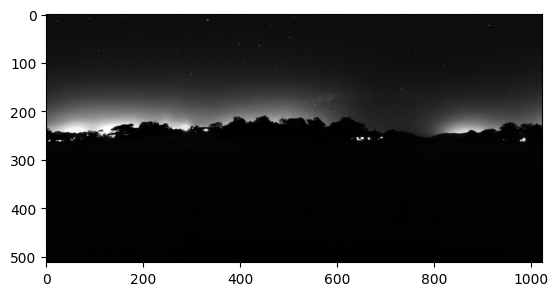

In [35]:
imagen = golf.convert("L")
array_imagen = np.array(imagen)
print(array_imagen)
plt.imshow(array_imagen,cmap='gray', vmin=0, vmax=255)

In [36]:
def compresion_rango(imagen,c):
    imagen_comp = np.log(imagen + 1) * c
    plt.imshow(imagen_comp, cmap='gray', vmin=0, vmax=255)

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

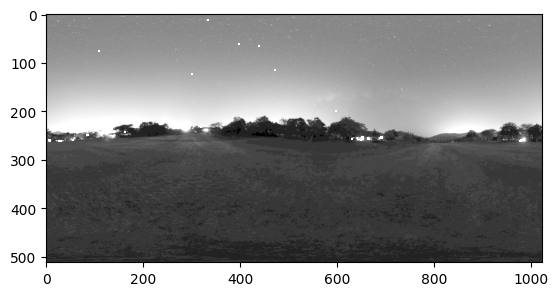

In [47]:
#compresion_rango(np.array,int)
np.seterr(divide = 'ignore') #usamos esto porque da warning de division por 0.
compresion_rango(array_imagen, 50)
np.seterr(divide = 'warn') 

## Imagen negativa

2. Implementar una función que devuelva el negativo de una imagen.

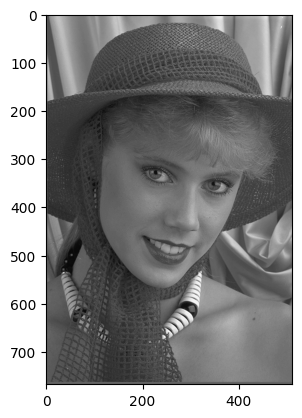

In [26]:
imagen_positiva_PIL = Image.open("1_Introduccion/imagenes1/kodim04.png")
imagen_positiva_PIL = imagen_positiva_PIL.convert("L")
img_pos = np.array(imagen_positiva_PIL)
plt.imshow(img_pos,cmap='gray', vmin=0, vmax=255)

In [28]:
def negativa(imagen):
    imagen_negativa = np.array(255 - img_pos)
    plt.imshow(imagen_negativa,cmap='gray', vmin=0, vmax=255)

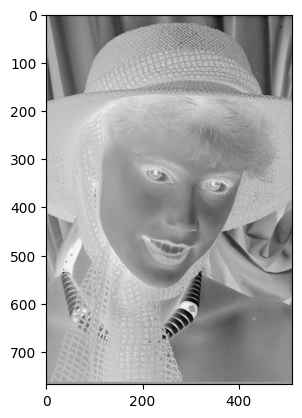

In [29]:
# negativa(np.array)
negativa(img_pos)

## Histograma de niveles de gris

Implementar una función que devuelva el histograma de niveles de gris de una imagen.

In [9]:
def histograma(imagen):
    imagen = imagen.convert("L")  # Convertimos imagen a Grayscale
    imagen = np.array(imagen)  # Convertimos PIL.Image a NP.ARRAY

    # Creamos una figura con 2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Primer subplot: Imagen original (escala de grises)
    axs[0].imshow(imagen, cmap='gray', vmin=0, vmax=255)  # Imprimimos imagen, importante el vmin vmax sino PIL la ecualiza.
    axs[0].set_title('Imagen - Grayscale')
    axs[0].axis('scaled')  # Maintain aspect ratio
    axs[0].axis('off')  # Para ocultar los ticks

    # Segundo subplot: Histograma
    hist, bin_edges = np.histogram(imagen.ravel(), 256, [0, 255])
    axs[1].plot(hist)
    axs[1].set_xlim([0, 255])
    axs[1].set_title('Histograma')
    axs[1].set_xlabel('Valor de Pixel')
    axs[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

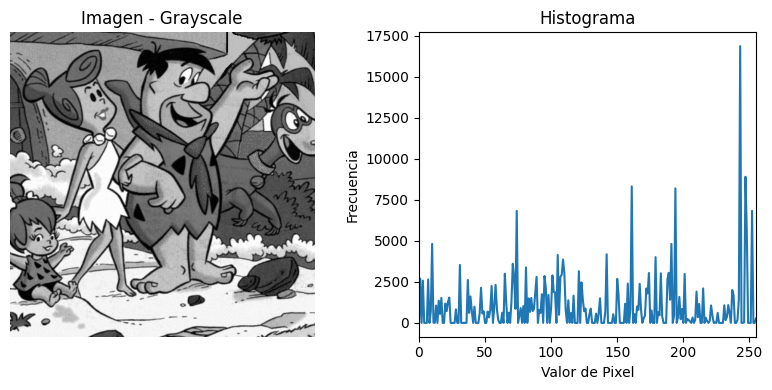

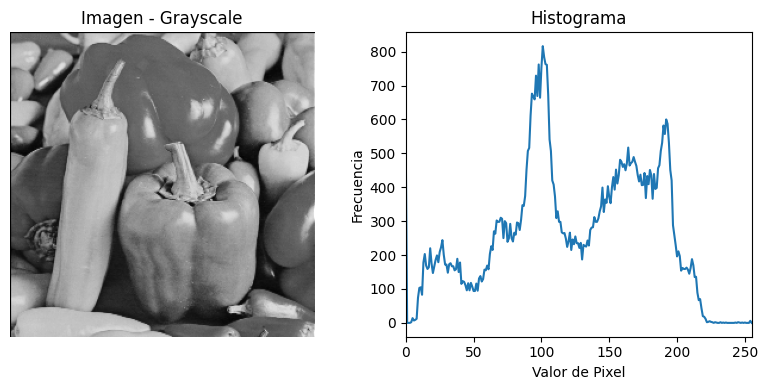

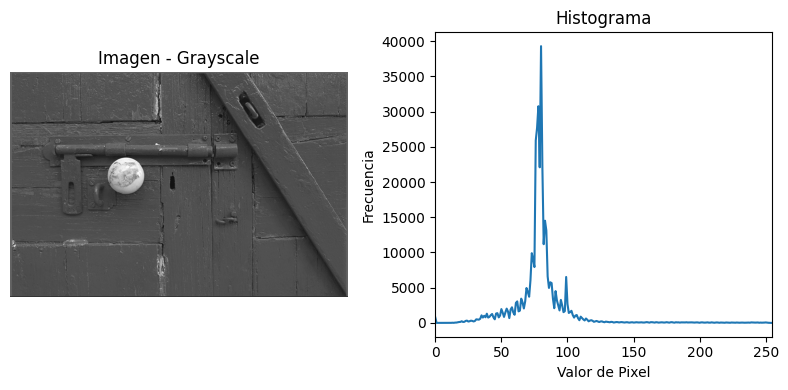

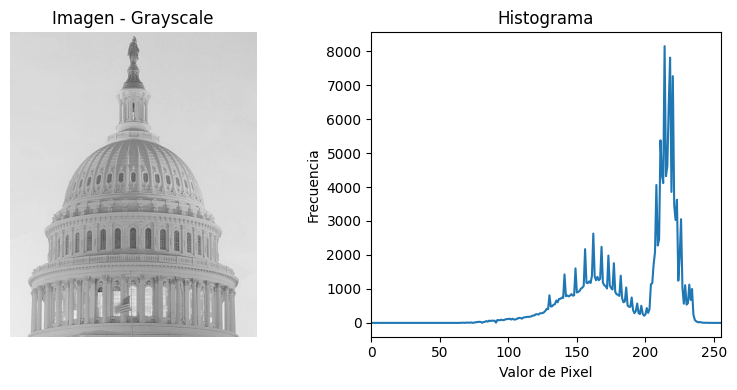

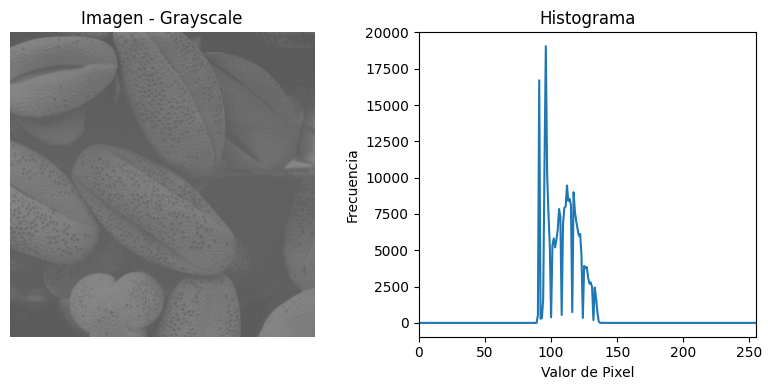

In [20]:
#histograma recibe argumento de tipo PIL.Image
histograma(flintstones)
histograma(peppers)
histograma(door)
histograma(cupula)
histograma(seeds)

### Aumento de contraste
Examinando el histograma, implementar una función que devuelva una imagen que tenga aumento del contraste.

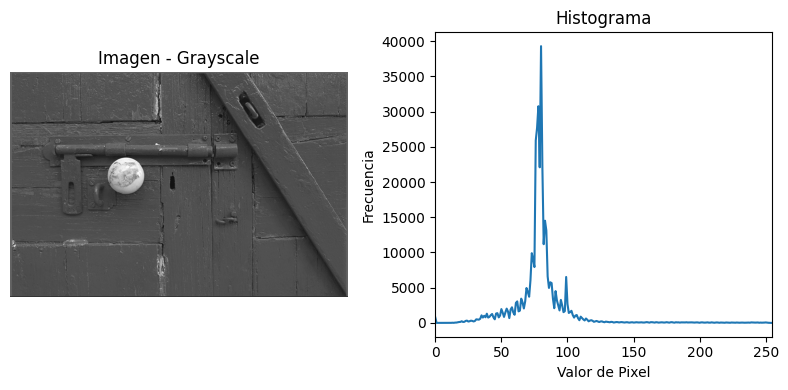

In [11]:
histograma(door)

In [12]:
def histograma_np(imagen):
    # Creamos una figura con 2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Primer subplot: Imagen original (escala de grises)
    axs[0].imshow(imagen, cmap='gray',vmin=0, vmax=255)  # Imprimimos imagen
    axs[0].set_title('Imagen - Grayscale')
    axs[0].axis('scaled')  # Maintain aspect ratio
    axs[0].axis('off')  # Para ocultar los ticks

    # Segundo subplot: Histograma
    hist, bin_edges = np.histogram(imagen.ravel(), 256, [0, 255])
    axs[1].plot(hist)
    axs[1].set_xlim([0, 255])
    axs[1].set_title('Histograma')
    axs[1].set_xlabel('Valor de Pixel')
    axs[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

In [13]:
def aumento_contraste(imagen):
    imagen_contrastada = imagen.convert("L")
    imagen_contrastada = np.array(imagen_contrastada)
    max = np.max(imagen_contrastada)
    min = np.min(imagen_contrastada)
    
    imag_contrastada = (imagen_contrastada - min) * (255 / (max - min))
    histograma_np(imag_contrastada)
    
    return imag_contrastada

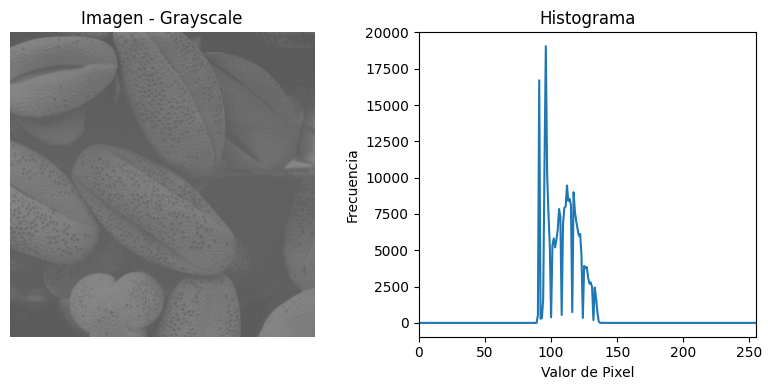

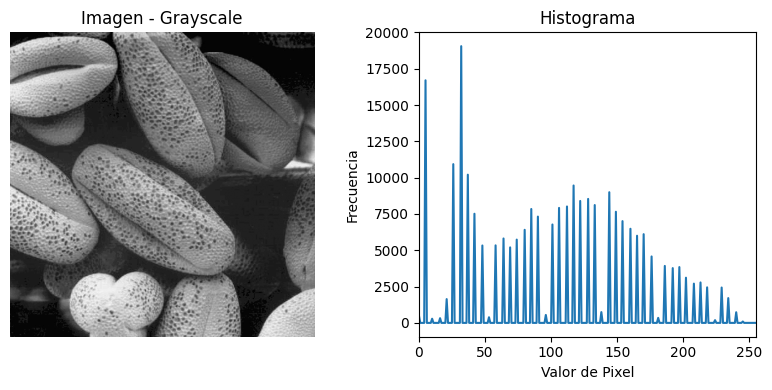

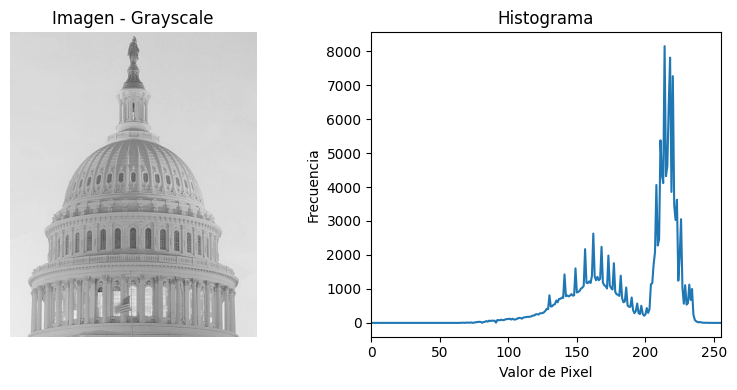

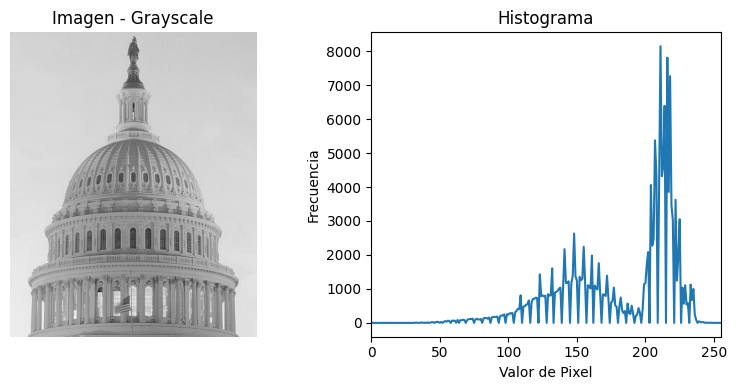

array([[200.87264151, 210.49528302, 202.0754717 , ..., 198.46698113,
        198.46698113, 199.66981132],
       [203.27830189, 206.88679245, 205.68396226, ..., 198.46698113,
        197.26415094, 199.66981132],
       [203.27830189, 205.68396226, 205.68396226, ..., 196.06132075,
        197.26415094, 197.26415094],
       ...,
       [236.95754717, 236.95754717, 236.95754717, ..., 228.53773585,
        227.33490566, 227.33490566],
       [238.16037736, 236.95754717, 236.95754717, ..., 227.33490566,
        227.33490566, 227.33490566],
       [236.95754717, 236.95754717, 236.95754717, ..., 227.33490566,
        227.33490566, 227.33490566]])

In [41]:
histograma(seeds)
aumento_contraste(seeds)
histograma(cupula)
aumento_contraste(cupula)

---
### Umbral - Imagen Binaria

Implementar una función que aplique un umbral a una imagen, devolviendo una imagen binaria.

In [15]:
def binaria(imagen):
    imagen_binaria = imagen.convert("L")
    imagen_binaria = np.array(imagen_binaria)
    umbral = np.mean(imagen_binaria)
    bajo_umbral = imagen_binaria < umbral
    sobre_umbral = imagen_binaria >= umbral
    imagen_binaria[bajo_umbral] = 0
    imagen_binaria[sobre_umbral] = 255
    histograma_np(imagen_binaria)

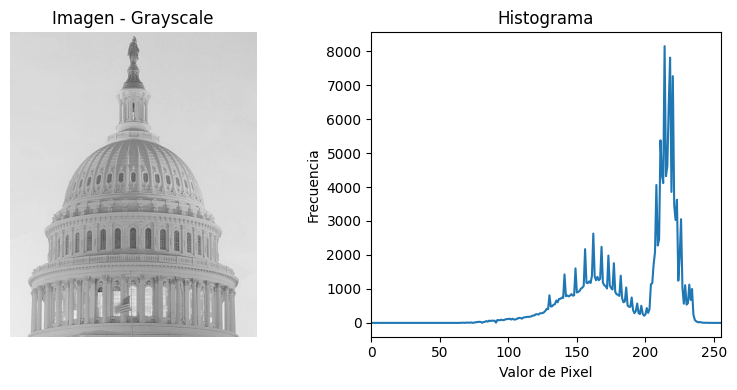

[[206 214 207 ... 204 204 205]
 [208 211 210 ... 204 203 205]
 [208 210 210 ... 202 203 203]
 ...
 [236 236 236 ... 229 228 228]
 [237 236 236 ... 228 228 228]
 [236 236 236 ... 228 228 228]]


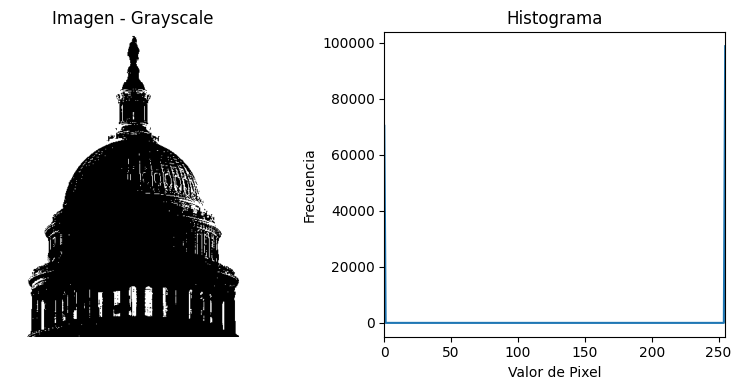

In [16]:
histograma(cupula)
print(np.array(cupula))
binaria(cupula)

### Ecualizacion

Dada una imagen a la cual se le ecualiz ́o su histograma, aplicar la ecualizaci ́on del histograma por segunda vez a la misma imagen. Observar el resultado y dar una explicaci ́on de lo sucedido.

In [17]:
def ecu(imagen):
    img = imagen.convert("L")
    img = np.array(img)

    histograma_np(img)
    hist, bins = np.histogram(img.flatten(), bins=256, range=(0, 256))
    fdc = hist.cumsum()  #funcion de distribucion acumulada numpy
    fdc_normalizada = (fdc * 255) / fdc[-1]
    ecualizada = fdc_normalizada[img]
    histograma_np(ecualizada)
    return ecualizada

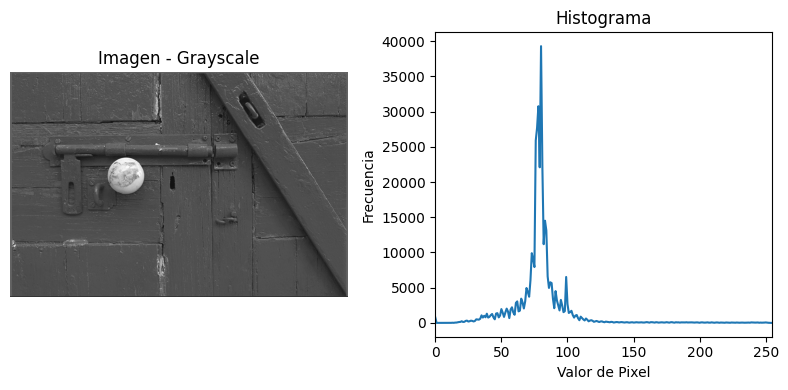

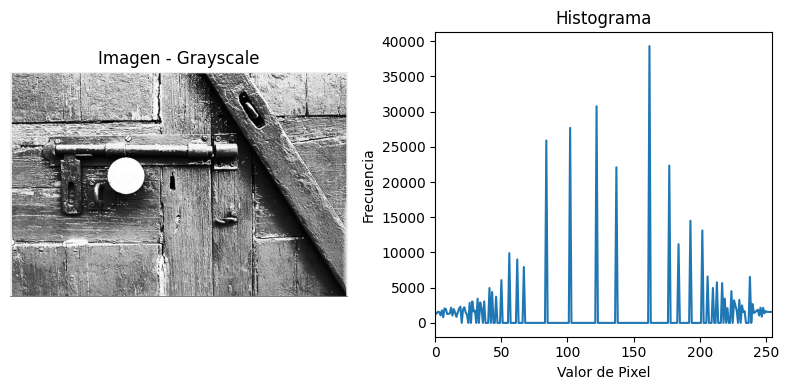

array([[237.99053192, 237.99053192, 237.99053192, ..., 237.99053192,
        237.99053192, 237.99053192],
       [237.99053192, 237.99053192, 237.99053192, ..., 237.99053192,
        237.99053192, 237.99053192],
       [237.99053192, 237.99053192, 237.99053192, ..., 237.99053192,
        237.99053192, 237.99053192],
       ...,
       [237.99053192, 237.99053192, 237.99053192, ..., 243.46645355,
        237.99053192, 237.99053192],
       [237.99053192, 237.99053192, 237.99053192, ..., 237.99053192,
        237.99053192, 237.99053192],
       [  0.49804688,   0.49804688,   0.49804688, ...,   0.49804688,
          0.49804688,   0.49804688]])

In [18]:
ecu(door)